In [ ]:
a = 2
b = 2
c = 3/4
d = 4
e = 2
m = 1/3
f = 3

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import OrderedDict

In [ ]:
import math
import random

In [ ]:
def f1(x):
    return m*x + b
    
def f2(x):
    return a*np.cos(b*x) + c*np.sin(d*x) + e

def f3(x):
    return a*np.exp(b*x)*np.cos(c*x) + d*np.exp(e*x)*np.sin(f*x)

def f4(x):
    return a*np.sin(b*x) + c*np.cos(d*x) + e

In [ ]:
# Generate an array of 100 x-values using numpy
x = []
for i in range(100):
    x.append(i)

x=np.array(x)

# Calculating the corresponding y-values for each x-value using the function
y1 = f1(x)

# converting to radians
x=x*(math.pi/180)

y2 = f2(x)
y3 = f3(x)
y4 = f4(x)

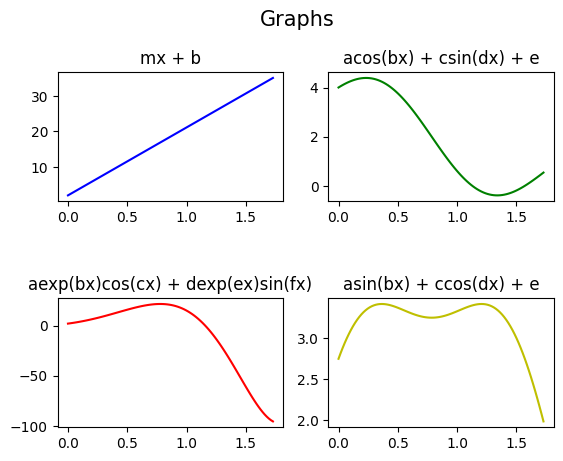

In [ ]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.75, top=0.85)

fig.suptitle("Graphs", fontsize=15)

# Add the subplots
ax1 = fig.add_subplot(2,2,1)
plt.plot(x, y1,'b')
ax1.title.set_text("mx + b")

ax2 = fig.add_subplot(2,2,2)
plt.plot(x, y2,'g')
ax2.title.set_text("acos(bx) + csin(dx) + e")

ax3 = fig.add_subplot(2,2,3)
plt.plot(x, y3,'r')
ax3.title.set_text("aexp(bx)cos(cx) + dexp(ex)sin(fx)")

ax4 = fig.add_subplot(2,2,4)
plt.plot(x, y4, 'y')
ax4.title.set_text("asin(bx) + ccos(dx) + e")

plt.show()

In [ ]:
# Creating dataframe for all functions

data1 = dict()
data2 = dict()
data3 = dict()
data4 = dict()


for i in range(100):

  y1[i]=y1[i]+random.uniform(-2,2)
  data1[x[i]]=y1[i]

  y2[i]=y2[i]+random.uniform(-0.5,0.5)
  data2[x[i]]=y2[i]

  y3[i]=y3[i]+random.uniform(-2,2)
  data3[x[i]]=y3[i]

  y4[i]=y4[i]+random.uniform(-.25,.25)
  data4[x[i]]=y4[i]

data1 = pd.DataFrame(data1.items())
data2 = pd.DataFrame(data2.items())
data3 = pd.DataFrame(data3.items())
data4 = pd.DataFrame(data4.items())


In [ ]:
# df : dataset
# train_size : proportion of instances for training
# val_size  : proportion of instances for validation

def train_val_test_split(df,train_size,val_size):
    # shuffling the rows randomly to avoid uneveness
    df = df.sample(frac = 1,random_state=24)

    # number of instances
    rows = len(df)
    train_idx = int(len(df)*train_size)
    train = df[0:train_idx]

    val_idx = train_idx + int(len(df)*val_size)
    val = df[train_idx:val_idx]

    test = df[val_idx:]    
    
    return train,val,test

In [ ]:
train_size = 0.7
val_size = (1-train_size)/2

train1, val1, test1 = train_val_test_split(data1, train_size, val_size)
train2, val2, test2 = train_val_test_split(data2, train_size, val_size)
train3, val3, test3 = train_val_test_split(data3, train_size, val_size)
train4, val4, test4 = train_val_test_split(data4, train_size, val_size)

# **LINEAR REGRESSION**

In [ ]:
# Define the mean squared error function
def mse(y, y_pred):
    return np.mean((y - y_pred)**2)


Univariate Linear Regression

In [ ]:
def UnivariateLinearRegression(lr,epochs,x_train,y_train,x_val,y_val):
    
    # Initialize the parameters of the line
    # theta0 = np.random.rand()
    # theta1 = np.random.rand()

    theta0=0
    theta1=0
    error_train = []
    error_val = []

    for i in range(epochs):

        y_pred = theta0 + theta1*x_train
        error_train.append(mse(y_train, y_pred))

        y_pred_val = theta0 + theta1*x_val
        error_val.append(mse(y_val, y_pred_val))


        # GRADIENT DESCENT for UNIVARIATE LINEAR REGRESSION

        gradient0 = -2*np.mean(y_train - y_pred)
        gradient1 = -2*np.mean((y_train - y_pred)*x_train)

        theta0 -= lr*gradient0
        theta1 -= lr*gradient1

    error_train = np.array(error_train)
    error_val = np.array(error_val)

    return theta0,theta1,error_train,error_val


In [ ]:
def plot_univariate(theta0,theta1,x,y):

    plt.scatter(x, y,color = "red",marker = "o", s = 10)
    plt.plot(x, theta0 + theta1*x, color='blue')
    plt.title(f"{round(theta1,2)}x + {round(theta0,2)}")
    plt.show()

In [ ]:
def plot_error(error_train,error_val,epochs):
    x_axis = x = np.arange(0,epochs)

    plt.plot(x_axis, error_train, color='darkorange')
    plt.plot(x_axis, error_val, color='green')

    plt.legend(["train", "val"], loc ="upper right")

    plt.xlabel('Epochs') 
    plt.ylabel('Error')

    plt.show()
    

In [ ]:
def plot_pred(x_train,y_train,x_val,y_val,x_test,y_test,theta0,theta1):

    y_pred_train = theta0 + theta1*x_train
    y_pred_val = theta0 + theta1*x_val
    y_pred_test = theta0 + theta1*x_test

    plt.scatter(x_train, y_train,color = "red",marker = "o", s = 10)
    plt.scatter(x_train, y_pred_train,color = "blue",marker = "o", s = 10)
    plt.legend(["actual", "predicted"], loc ="lower right")
    plt.title("Train")
    plt.show()

    plt.scatter(x_val, y_val,color = "red",marker = "o", s = 10)
    plt.scatter(x_val, y_pred_val,color = "blue",marker = "o", s = 10)
    plt.legend(["actual", "predicted"], loc ="lower right")
    plt.title("Validation")
    plt.show()

    plt.scatter(x_test, y_test,color = "red",marker = "o", s = 10)
    plt.scatter(x_test, y_pred_test,color = "blue",marker = "o", s = 10)
    plt.legend(["actual", "predicted"], loc ="lower right")
    plt.title("Test")
    plt.show()

1.

In [ ]:
x_train = np.array(train1[0])
y_train = np.array(train1[1])

x_val = np.array(val1[0])
y_val = np.array(val1[1])

x_test = np.array(test1[0])
y_test = np.array(test1[1])

# REGRESSION LINE AND LEARNING CURVE FOR FUNCTION 1

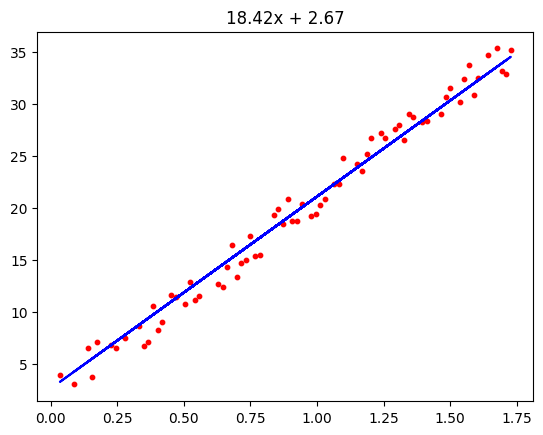

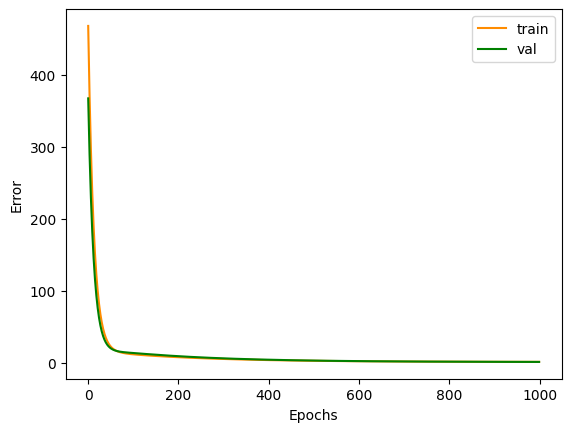

In [ ]:
# create and fit our model

lr=0.01
epochs=1000
theta0,theta1,error_train,error_val = UnivariateLinearRegression(lr,epochs,x_train,y_train,x_val,y_val)

plot_univariate(theta0,theta1,x_train,y_train)
plot_error(error_train,error_val,epochs)

plt.show()


# TRAIN, VALIDATION, TEST CURVES

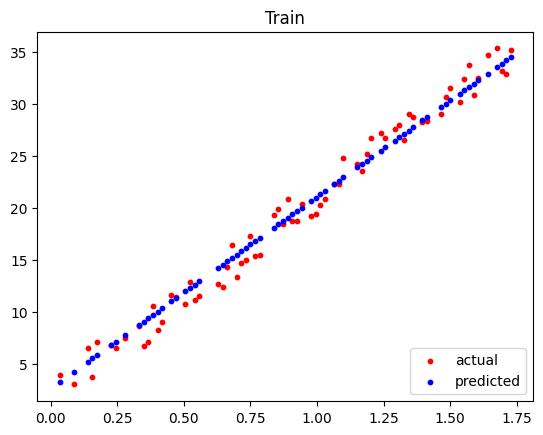

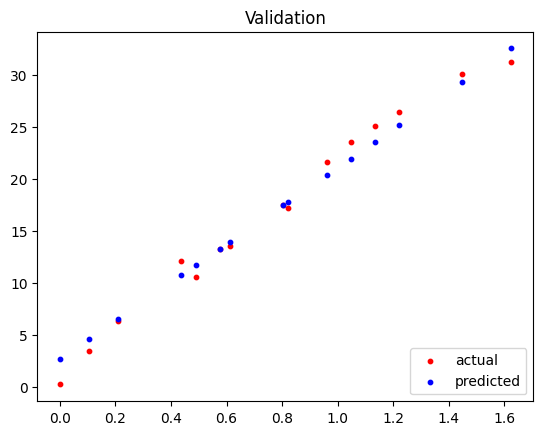

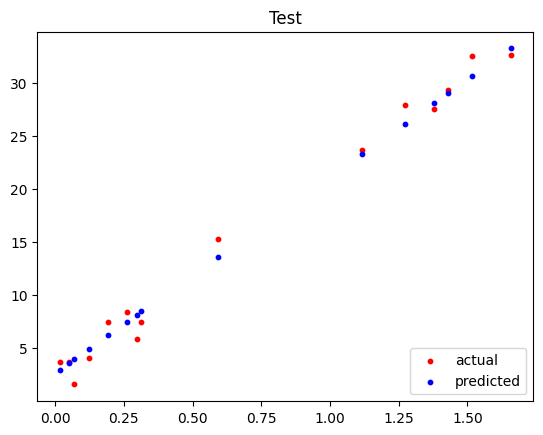

In [ ]:
plot_pred(x_train,y_train,x_val,y_val,x_test,y_test,theta0,theta1)

2.

In [ ]:
x_train = np.array(train2[0])
y_train = np.array(train2[1])

x_val = np.array(val2[0])
y_val = np.array(val2[1])

x_test = np.array(test2[0])
y_test = np.array(test2[1])

# REGRESSION LINE AND LEARNING CURVE FOR FUNCTION 2

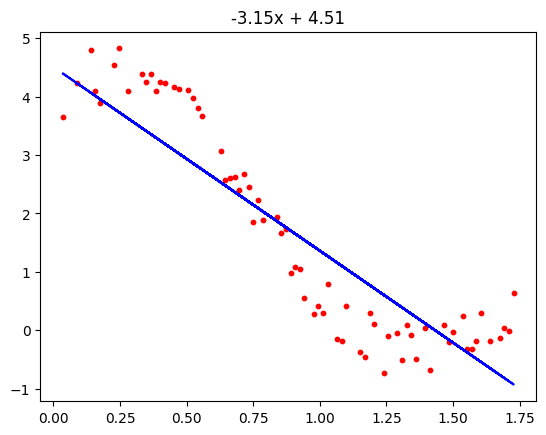

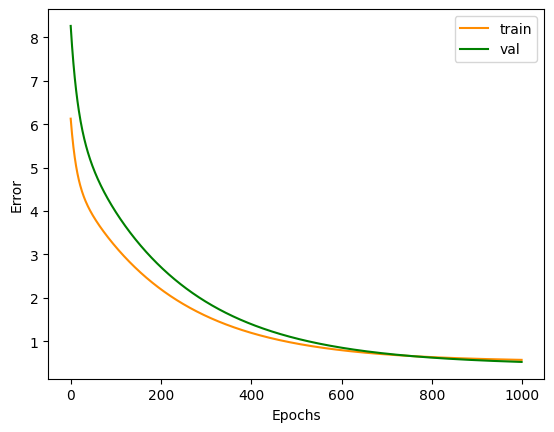

In [ ]:
# create and fit our model

lr=0.01
epochs=1000
theta0,theta1,error_train,error_val = UnivariateLinearRegression(lr,epochs,x_train,y_train,x_val,y_val)

plot_univariate(theta0,theta1,x_train,y_train)
plot_error(error_train,error_val,epochs)

plt.show()



# TRAIN, VALIDATION, TEST CURVES

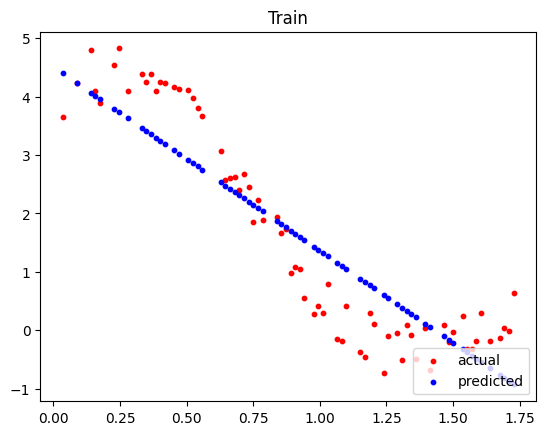

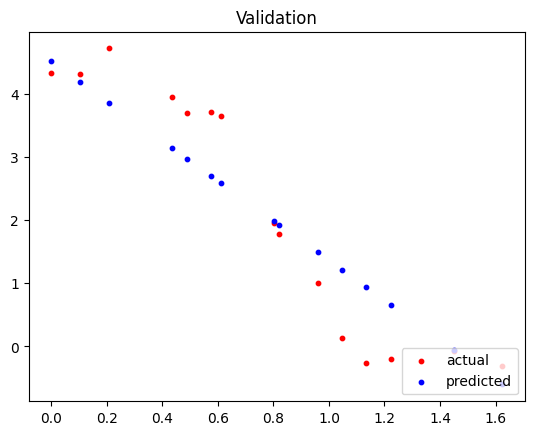

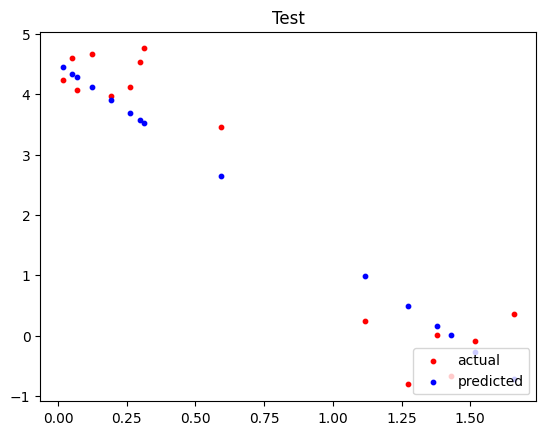

In [ ]:
plot_pred(x_train,y_train,x_val,y_val,x_test,y_test,theta0,theta1)

3.

In [ ]:
x_train = np.array(train3[0])
y_train = np.array(train3[1])

x_val = np.array(val3[0])
y_val = np.array(val3[1])

x_test = np.array(test3[0])
y_test = np.array(test3[1])

# REGRESSION LINE AND LEARNING CURVE FOR FUNCTION 3

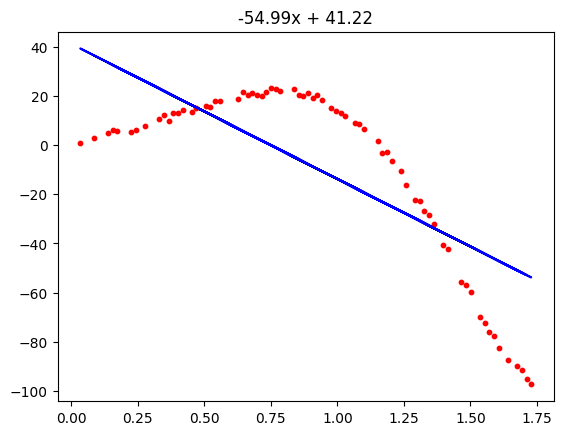

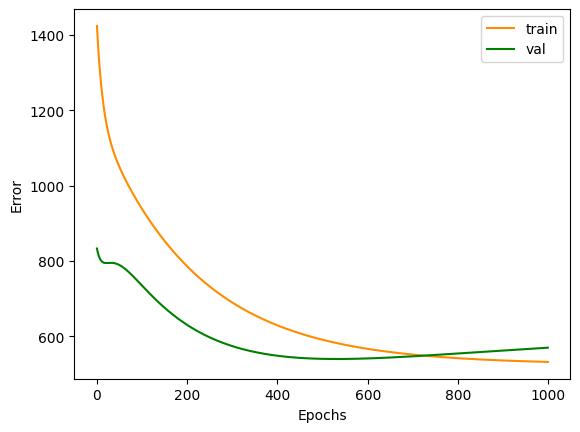

In [ ]:
# create and fit our model

lr=0.01
epochs=1000
theta0,theta1,error_train,error_val = UnivariateLinearRegression(lr,epochs,x_train,y_train,x_val,y_val)

plot_univariate(theta0,theta1,x_train,y_train)
plot_error(error_train,error_val,epochs)

plt.show()



# TRAIN, VALIDATION, TEST CURVES

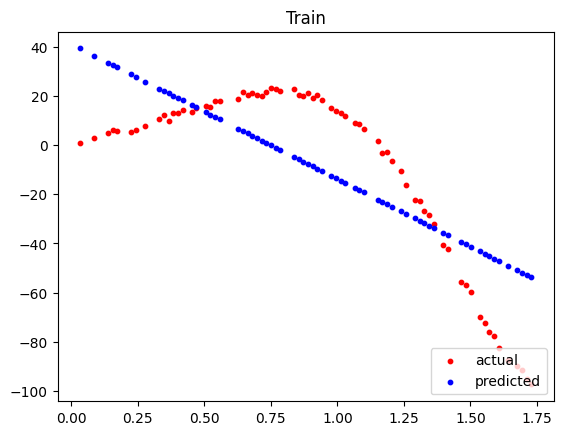

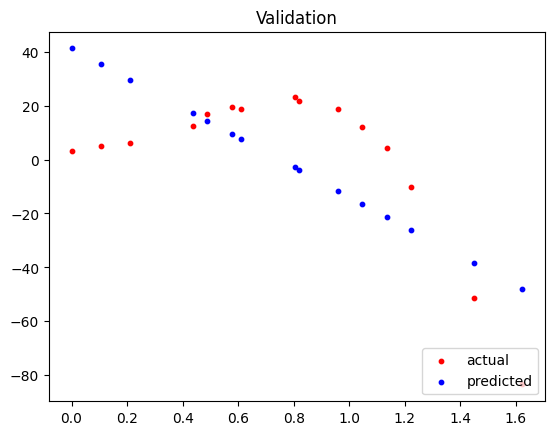

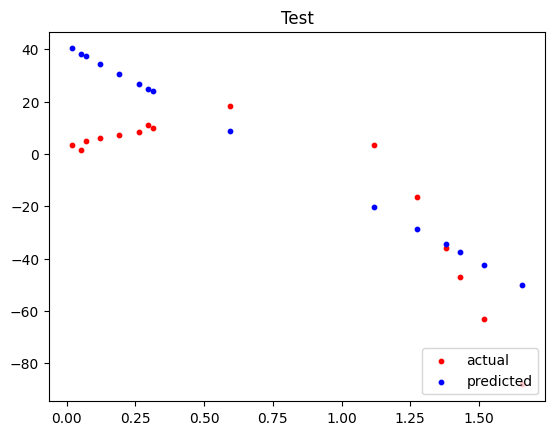

In [ ]:
plot_pred(x_train,y_train,x_val,y_val,x_test,y_test,theta0,theta1)

4.

In [ ]:
x_train = np.array(train4[0])
y_train = np.array(train4[1])

x_val = np.array(val4[0])
y_val = np.array(val4[1])

x_test = np.array(test4[0])
y_test = np.array(test4[1])

# REGRESSION LINE AND LEARNING CURVE FOR FUNCTION 4

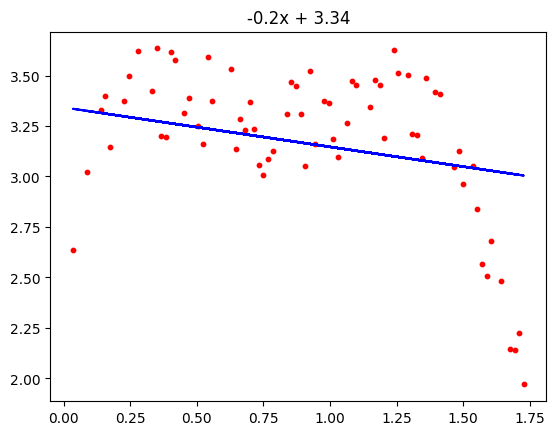

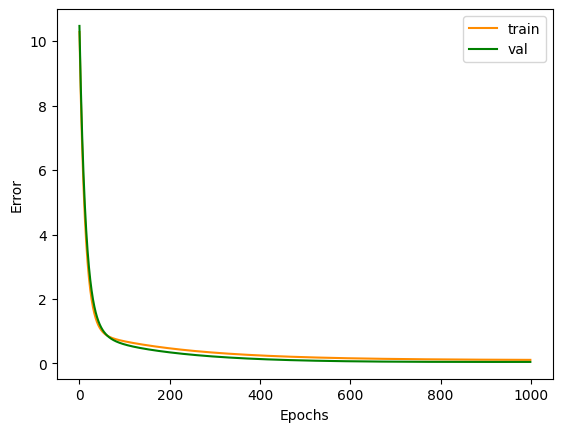

In [ ]:
# create and fit our model

lr=0.01
epochs=1000
theta0,theta1,error_train,error_val = UnivariateLinearRegression(lr,epochs,x_train,y_train,x_val,y_val)

plot_univariate(theta0,theta1,x_train,y_train)
plot_error(error_train,error_val,epochs)

plt.show()



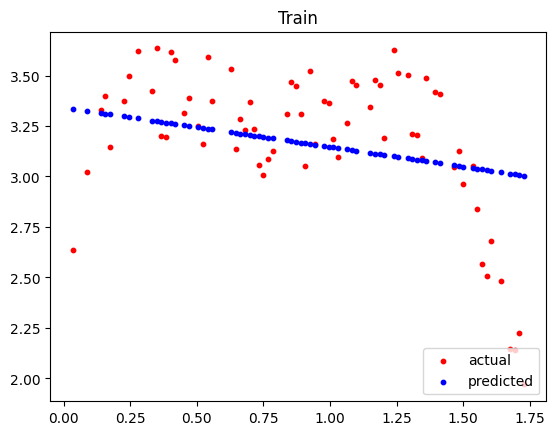

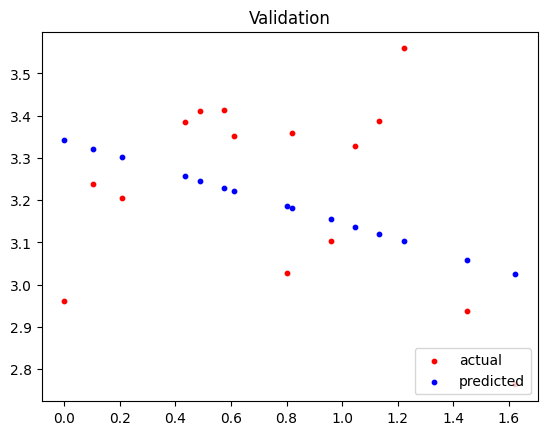

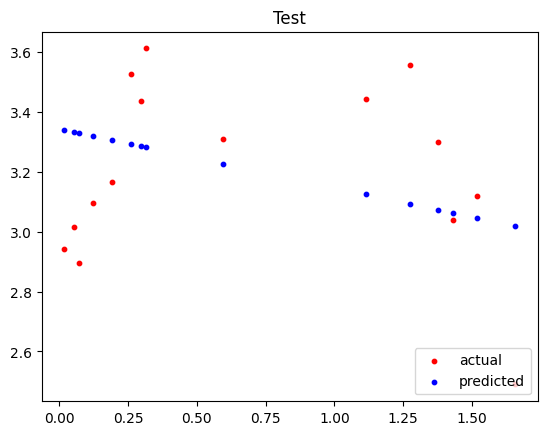

In [ ]:
plot_pred(x_train,y_train,x_val,y_val,x_test,y_test,theta0,theta1)

# **Polynomial Regression**

In [ ]:
x_train = np.array(train4[0])
y_train = np.array(train4[1])

x_val = np.array(val4[0])
y_val = np.array(val4[1])

x_test = np.array(test4[0])
y_test = np.array(test4[1])

In [ ]:
x_val

array([1.44862328, 0.82030475, 1.13446401, 0.80285146, 0.10471976,
       1.22173048, 0.95993109, 1.04719755, 1.6231562 , 0.57595865,
       0.20943951, 0.        , 0.48869219, 0.61086524, 0.43633231])

In [ ]:
class PolynomailRegression() :
     
    def __init__( self, degree, learning_rate, iterations ) :
         
        self.degree = degree
         
        self.learning_rate = learning_rate
         
        self.iterations = iterations
         
    # function to transform X
     
    def transform( self, X ) :
         
        # initialize X_transform
        k = X.shape[0]
         
        X_transform = np.ones( ( k, 1 ) )
         
        j = 0
     
        for j in range( self.degree + 1 ) :
             
            if j != 0 :
                 
                x_pow = np.power( X, j )
                 
                # append x_pow to X_transform
                 
                X_transform = np.append( X_transform, x_pow.reshape( -1, 1 ), axis = 1 )
 
        return X_transform  
     
    # function to normalize X_transform
     
    def normalize( self, X ) :
         
        X[:, 1:] = ( X[:, 1:] - np.mean( X[:, 1:], axis = 0 ) ) / np.std( X[:, 1:], axis = 0 )
         
        return X
         
    # model training
     
    def fit( self, X, Y ) :
        val_err= []
        train_err=[]
        self.X = X
        X1 = x_val.reshape(-1,1)
        self.Y = Y
     
        self.m, self.n = self.X.shape
     
        # weight initialization
     
        self.W = np.zeros( self.degree + 1 )
        #self.W = np.empty( self.degree + 1,dtype = float )
         
        # transform X for polynomial  h( x ) = w0 * x^0 + w1 * x^1 + w2 * x^2 + ........+ wn * x^n
         
        X_transform = self.transform( self.X )
        X_transform1 = self.transform( X1 )

         
        # normalize X_transform
         
        X_normalize = self.normalize( X_transform )
        X_normalize1 = self.normalize( X_transform1 )

                 
        # gradient descent learning
       
        for i in range( self.iterations ) :
             
            h = self.predict( self.X )
            error = h - self.Y
            



            h1=self.predict(X1)
            error1 = h1 - y_val

            err = 0
            
            for j in error:
              err = err+j**2
            train_err.append(err/(error.shape[0])) 

            err1=0
            for k in error1:
              err1 = err1+k**2
            val_err.append(err1/(error1.shape[0]))   

            
             
            # update weights
         
            self.W = self.W - self.learning_rate * ( 1 / self.m ) * np.dot( X_normalize.T, error )

            

         
        return train_err,val_err
     
    # predict
     
    def predict( self, X ) :
      
        # transform X for polynomial  h( x ) = w0 * x^0 + w1 * x^1 + w2 * x^2 + ........+ wn * x^n
         
        X_transform = self.transform( X )
         
        #X_normalize = self.normalize( X_transform )
         
        return np.dot( X_transform, self.W )
       

In [ ]:
def OfUf():
  check_train=[]
  check_val=[]
  for i in range(1,11):
    X =x_train.reshape(-1,1)
     
    Y = y_train
    model = PolynomailRegression( degree = i, learning_rate = 0.01, iterations = 500 )
    a,b=model.fit( X, Y )
    Y_pred = model.predict( X )
    error = Y_pred - y_train
    error1=  b[len(b)-1]
    #print(b[len(b)-1])
    err=0
    for k in error:
      err=err+k**2
    check_train.append(err)
    check_val.append(error1)

  plt.plot(np.arange(1,11),check_train,label="train")
  #plt.plot(np.arange(1,7),check_val,label="validation")
  plt.xlabel("degree")
  plt.ylabel("error")
  plt.legend()
  plt.show()
  plt.plot(np.arange(1,11),check_val,label="validation")
  plt.xlabel("degree")
  plt.ylabel("error")
  plt.legend()
  plt.show()  


In [ ]:
def plot_pred(x_train,y_train,x_val,y_val,x_test,y_test):

    y_pred_train = model.predict(x_train)
    y_pred_val = model.predict(x_val)
    y_pred_test = model.predict(x_test)

    plt.scatter(x_train, y_train,color = "red",marker = "o", s = 10)
    plt.scatter(x_train, y_pred_train,color = "blue",marker = "o", s = 10)
    plt.legend(["actual", "predicted"], loc ="lower right")
    plt.title("Train")
    plt.show()

    plt.scatter(x_val, y_val,color = "red",marker = "o", s = 10)
    plt.scatter(x_val, y_pred_val,color = "blue",marker = "o", s = 10)
    plt.legend(["actual", "predicted"], loc ="lower right")
    plt.title("Validation")
    plt.show()

    plt.scatter(x_test, y_test,color = "red",marker = "o", s = 10)
    plt.scatter(x_test, y_pred_test,color = "blue",marker = "o", s = 10)
    plt.legend(["actual", "predicted"], loc ="lower right")
    plt.title("Test")
    plt.show()

# POLYNOMIAL REGRESSION LINE AND LEARNING CURVE FOR **`FUNCTION 1`**

In [ ]:
x_train = np.array(train1[0])
y_train = np.array(train1[1])

x_val = np.array(val1[0])
y_val = np.array(val1[1])

x_test = np.array(test1[0])
y_test = np.array(test1[1])

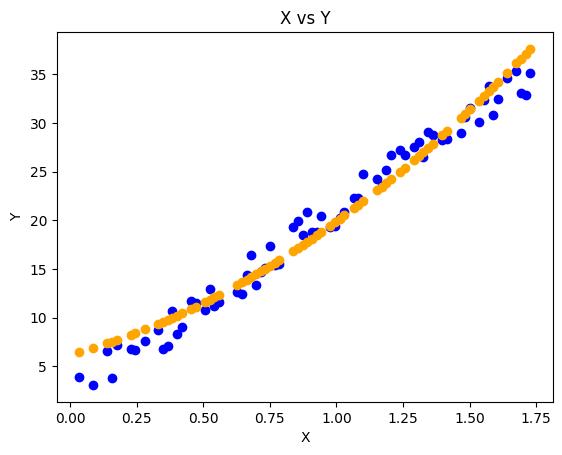

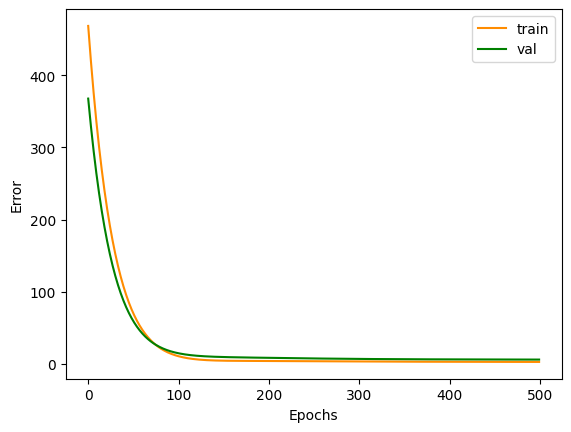

In [ ]:
X =x_train.reshape(-1,1)
     
Y = y_train
  
    # model training
     
model = PolynomailRegression( degree = 2, learning_rate = 0.01, iterations = 500 )
 
#train_error,val_error = model.fit( X, Y )
a,b=model.fit( X, Y )
     
    # Prediction on training set
 
Y_pred = model.predict( X )
     
    # Visualization
     
plt.scatter( X, Y, color = 'blue' )
     
plt.scatter( X, Y_pred, color = 'orange' )
     
plt.title( 'X vs Y' )
     
plt.xlabel( 'X' )
     
plt.ylabel( 'Y' )
     
plt.show()

plot_error(a,b,500)

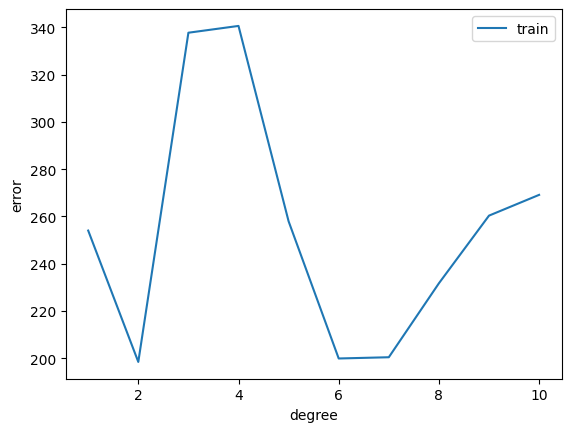

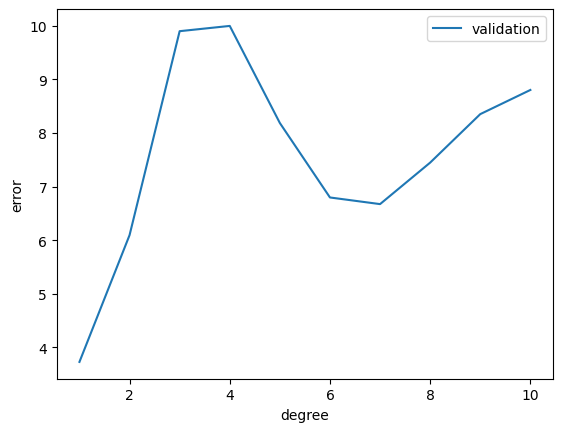

In [ ]:
OfUf()

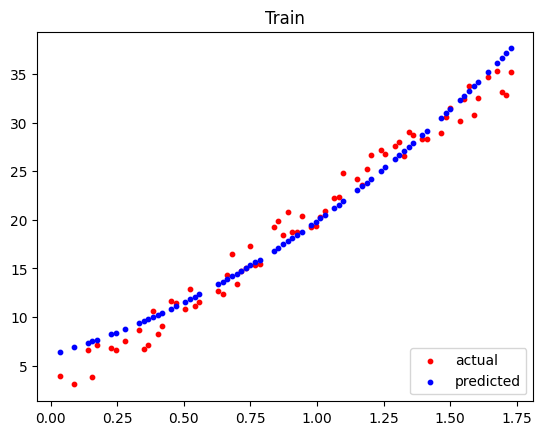

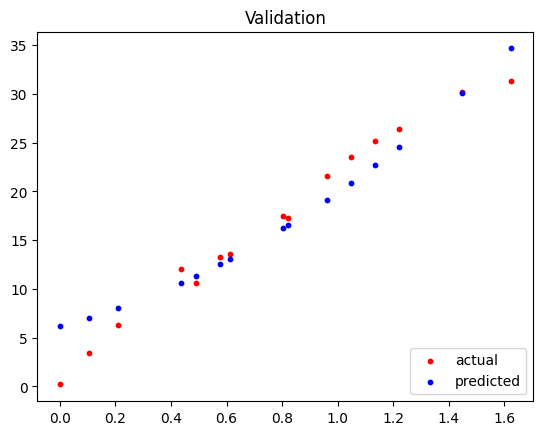

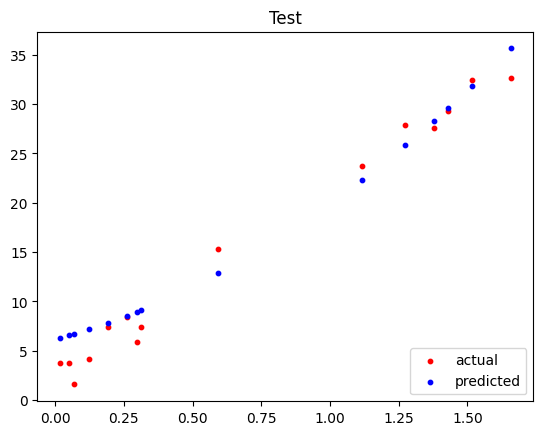

In [ ]:
plot_pred(x_train,y_train,x_val,y_val,x_test,y_test)

# POLYNOMIAL REGRESSION LINE AND LEARNING CURVE FOR **FUNCTION 2**

In [ ]:
x_train = np.array(train2[0])
y_train = np.array(train2[1])

x_val = np.array(val2[0])
y_val = np.array(val2[1])

x_test = np.array(test2[0])
y_test = np.array(test2[1])

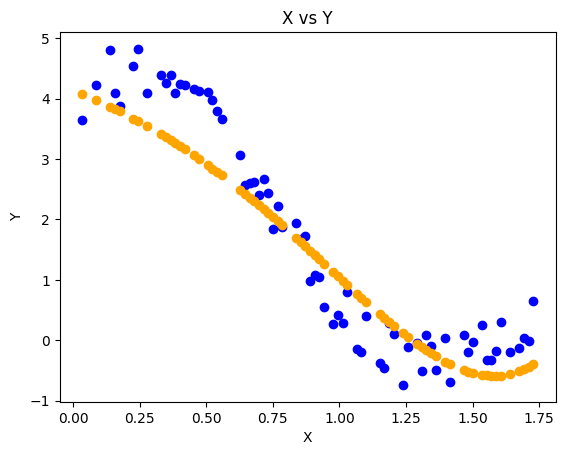

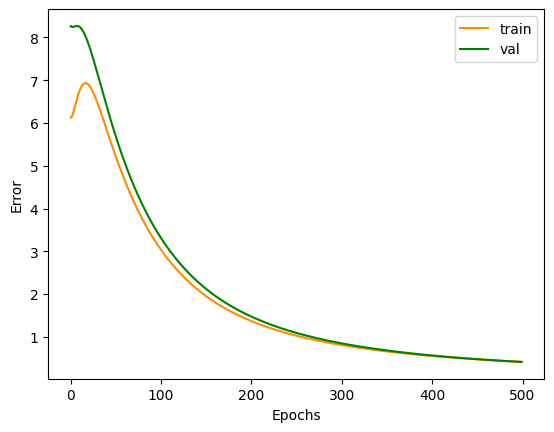

In [ ]:
X =x_train.reshape(-1,1)
     
Y = y_train
  
    # model training
     
model = PolynomailRegression( degree = 5, learning_rate = 0.01, iterations = 500 )
 
#train_error,val_error = model.fit( X, Y )
a,b =model.fit( X, Y )
     
    # Prediction on training set
 
Y_pred = model.predict( X )
     
    # Visualization
     
plt.scatter( X, Y, color = 'blue' )
     
plt.scatter( X, Y_pred, color = 'orange' )
     
plt.title( 'X vs Y' )
     
plt.xlabel( 'X' )
     
plt.ylabel( 'Y' )
     
plt.show()
plot_error(a,b,500)

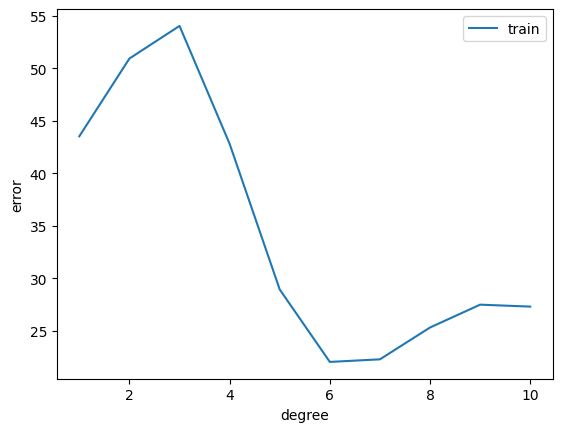

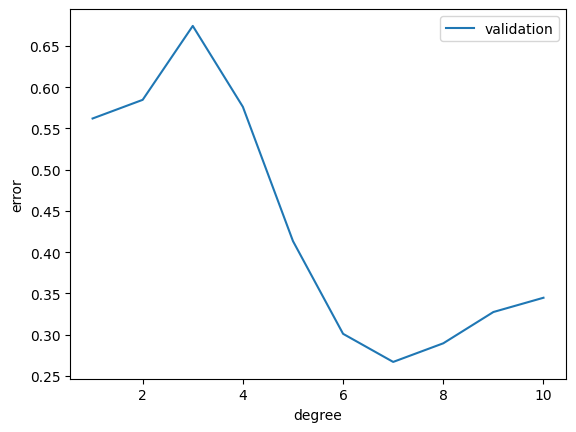

In [ ]:
OfUf()

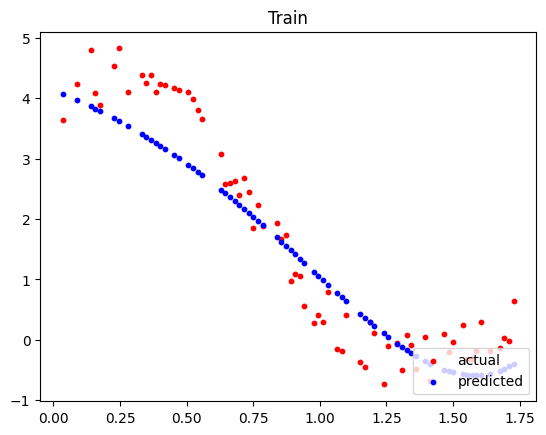

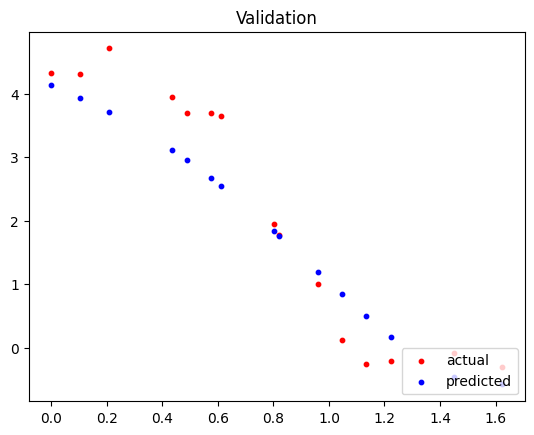

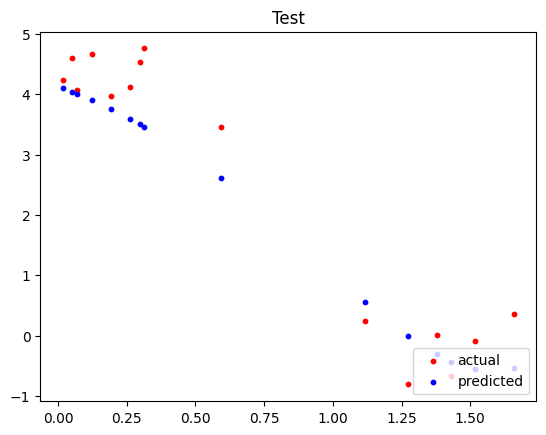

In [ ]:
plot_pred(x_train,y_train,x_val,y_val,x_test,y_test)

# POLYNOMIAL REGRESSION LINE AND LEARNING CURVE FOR **FUNCTION 3**

In [ ]:
x_train = np.array(train3[0])
y_train = np.array(train3[1])

x_val = np.array(val3[0])
y_val = np.array(val3[1])

x_test = np.array(test3[0])
y_test = np.array(test3[1])

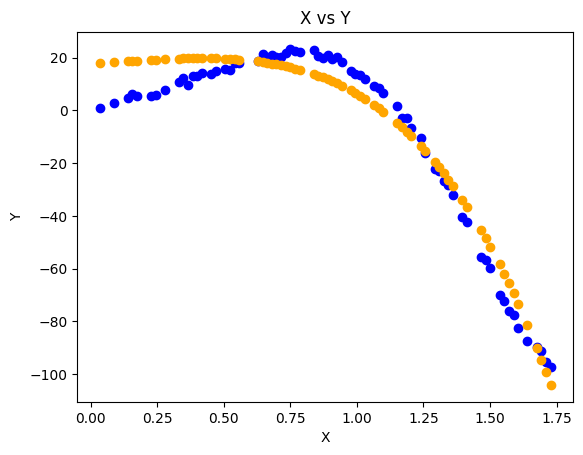

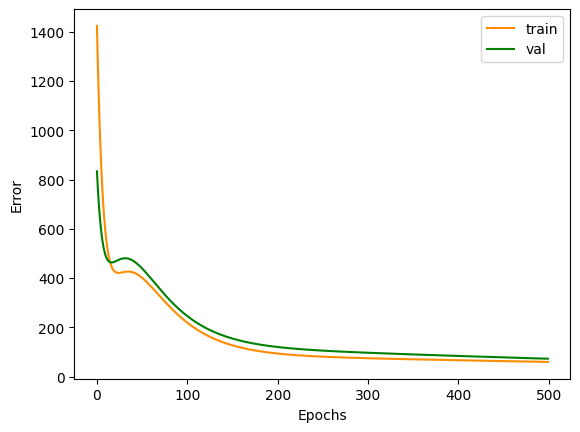

In [ ]:
X =x_train.reshape(-1,1)
     
Y = y_train
  
    # model training
     
model = PolynomailRegression( degree = 4, learning_rate = 0.01, iterations = 500 )
 
#train_error,val_error = model.fit( X, Y )
a,b=model.fit( X, Y )
     
    # Prediction on training set
 
Y_pred = model.predict( X )
     
    # Visualization
     
plt.scatter( X, Y, color = 'blue' )
     
plt.scatter( X, Y_pred, color = 'orange' )
     
plt.title( 'X vs Y' )
     
plt.xlabel( 'X' )
     
plt.ylabel( 'Y' )
     
plt.show()
plot_error(a,b,500)

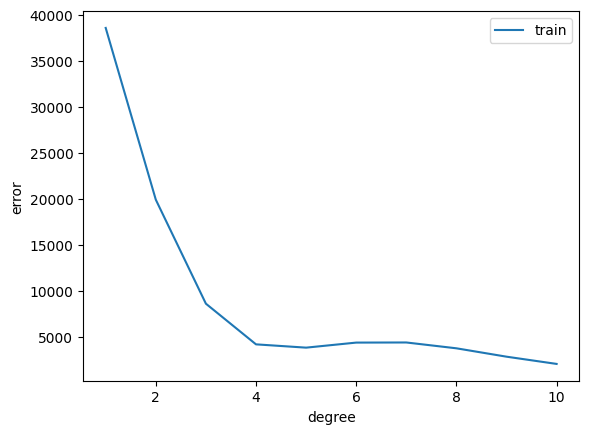

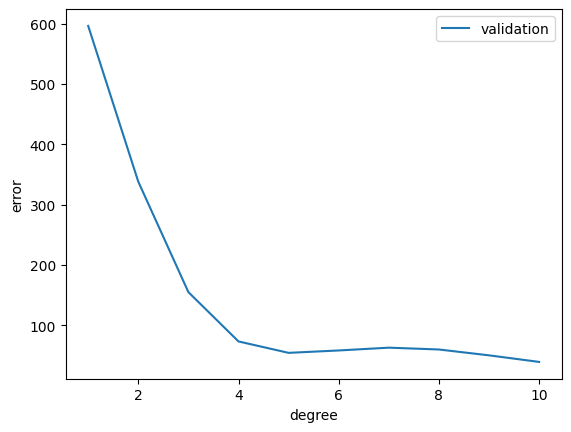

In [ ]:
OfUf()

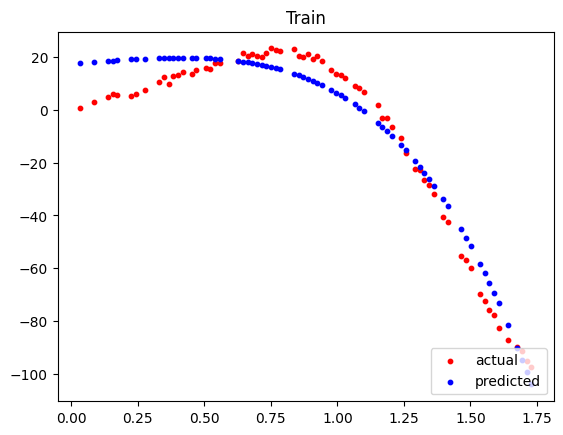

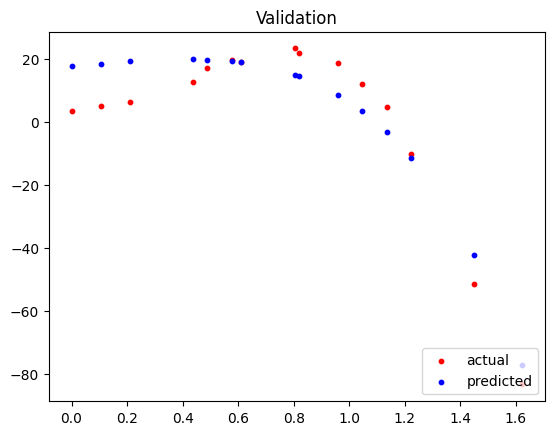

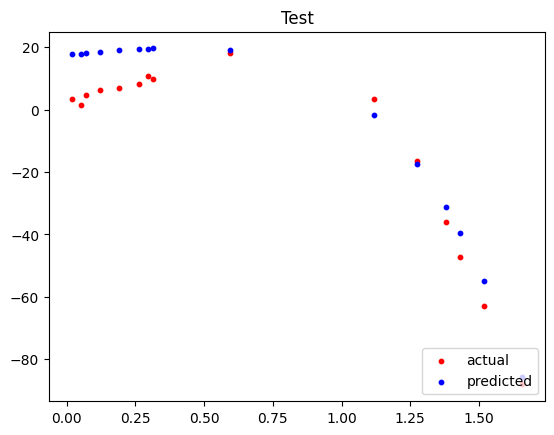

In [ ]:
plot_pred(x_train,y_train,x_val,y_val,x_test,y_test)

# POLYNOMIAL REGRESSION LINE AND LEARNING CURVE FOR **FUNCTION 4**

In [ ]:
x_train = np.array(train4[0])
y_train = np.array(train4[1])

x_val = np.array(val4[0])
y_val = np.array(val4[1])

x_test = np.array(test4[0])
y_test = np.array(test4[1])

In [ ]:
X =x_train.reshape(-1,1)
     
Y = y_train
  
    # model training
     
model = PolynomailRegression( degree = 6, learning_rate = 0.01, iterations = 500 )
 
#train_error,val_error = model.fit( X, Y )
a,b=model.fit( X, Y )
     
    # Prediction on training set
 
Y_pred = model.predict( X )
     
    # Visualization
     
plt.scatter( X, Y, color = 'blue' )
     
plt.scatter( X, Y_pred, color = 'orange' )
     
plt.title( 'X vs Y' )
     
plt.xlabel( 'X' )
     
plt.ylabel( 'Y' )
     
plt.show()
plot_error(a,b,500)

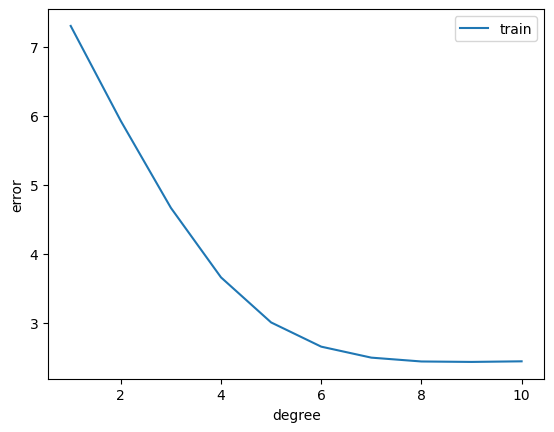

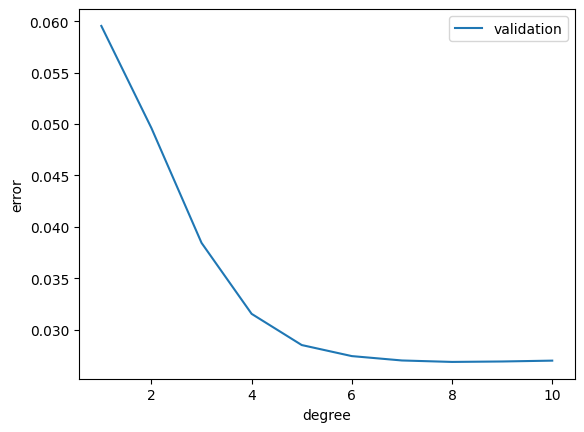

In [ ]:
# OfUf()

In [ ]:
def plot_pred(x_train,y_train,x_val,y_val,x_test,y_test):

    y_pred_train = model.predict(x_train)
    plt.scatter(x_train, y_train,color = "red",marker = "o", s = 10)
    plt.scatter(x_train, y_pred_train,color = "blue",marker = "o", s = 10)
    plt.legend(["actual", "predicted"], loc ="lower right")
    plt.title("Train")
    plt.show()


1


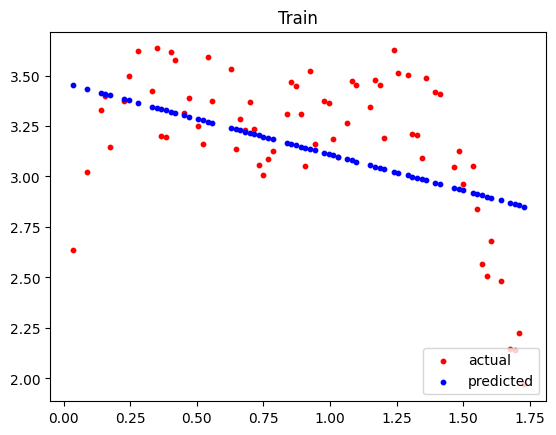

2


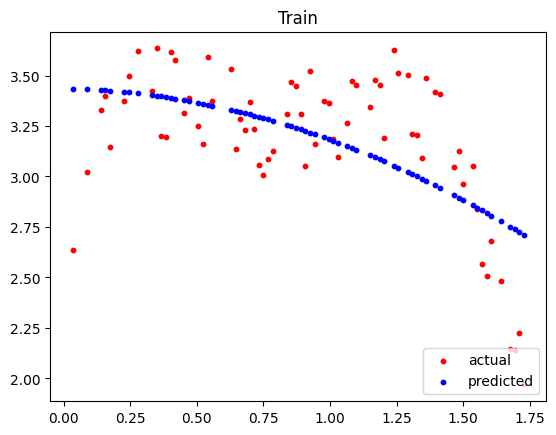

3


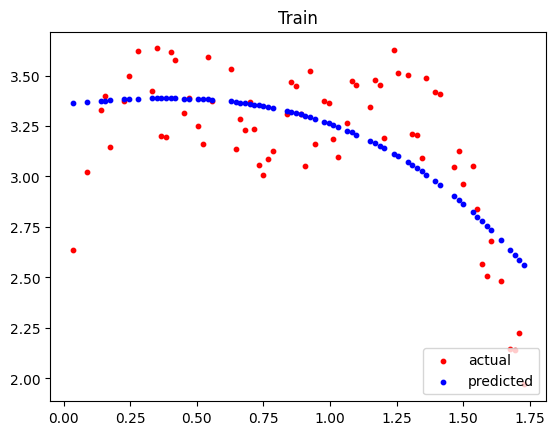

4


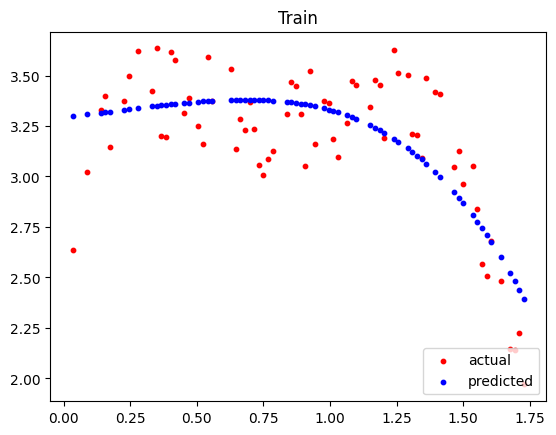

5


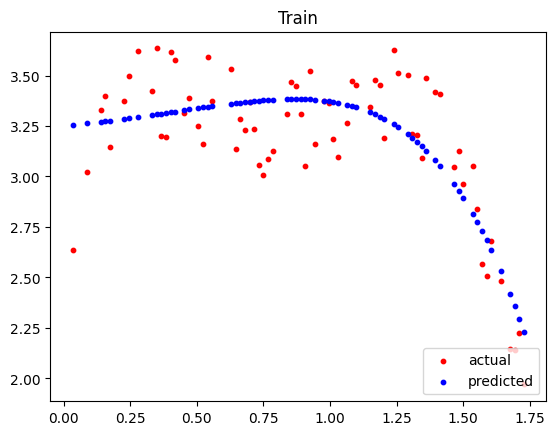

6


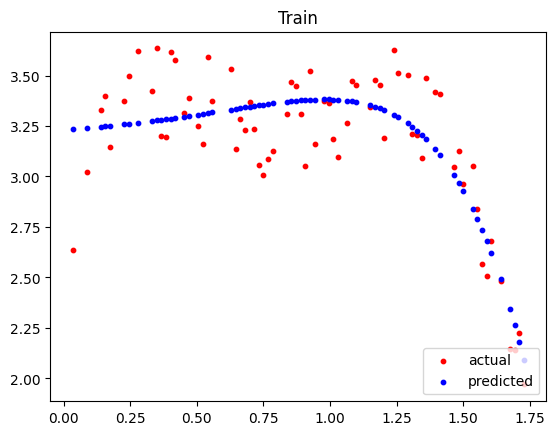

7


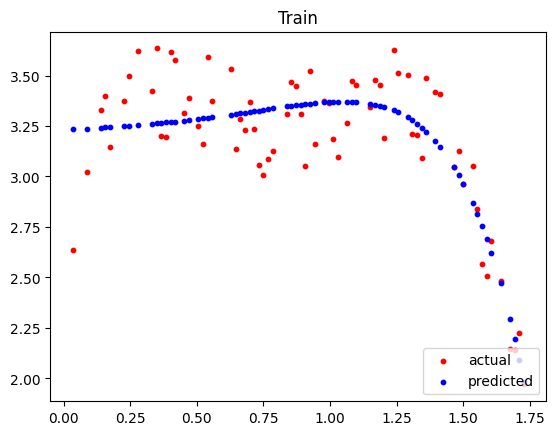

8


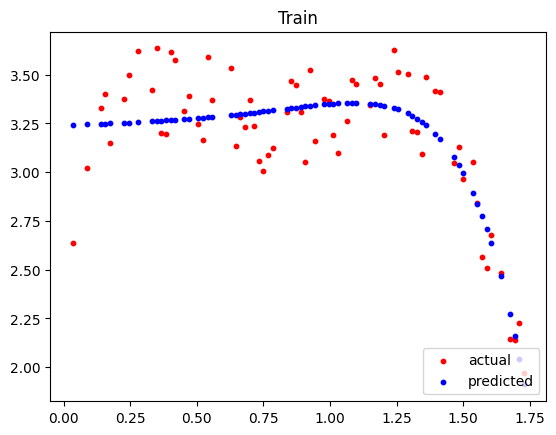

9


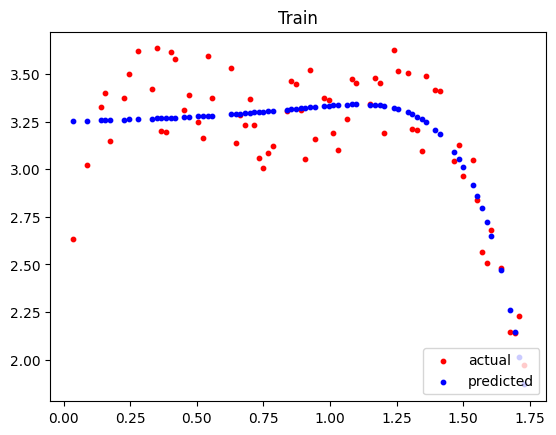

10


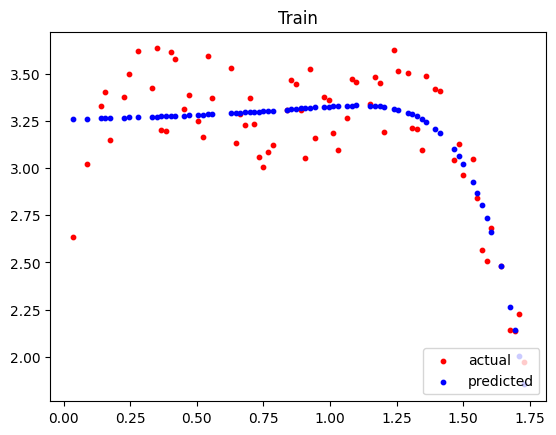

In [ ]:
X =x_train.reshape(-1,1)
Y = y_train

for i in range(1,11):
    print(i)
    model = PolynomailRegression( degree = i, learning_rate = 0.01, iterations = 500 )
    a,b=model.fit( X, Y )
    plot_pred(x_train,y_train,x_val,y_val,x_test,y_test)

1


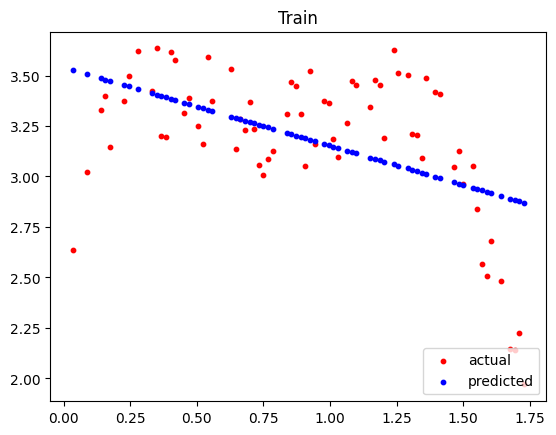

2


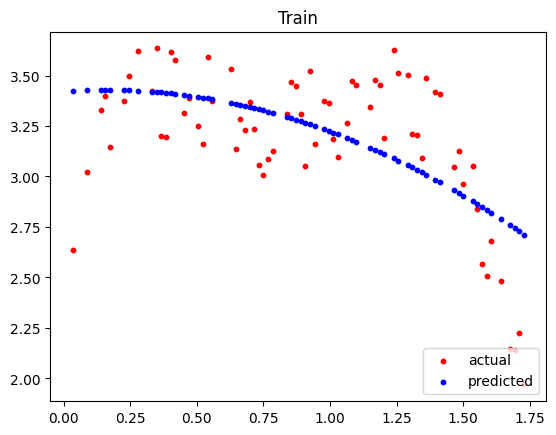

3


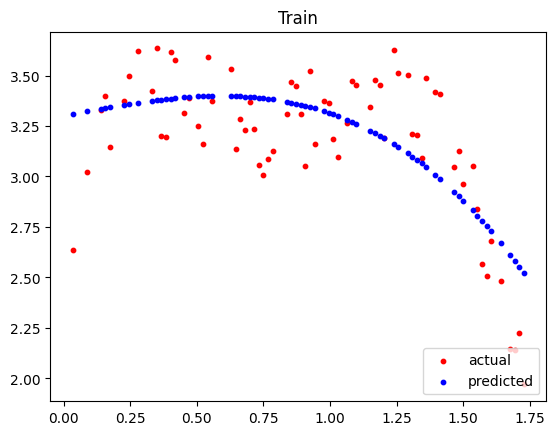

4


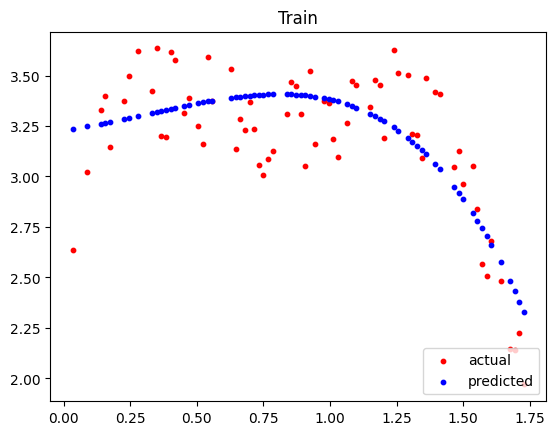

5


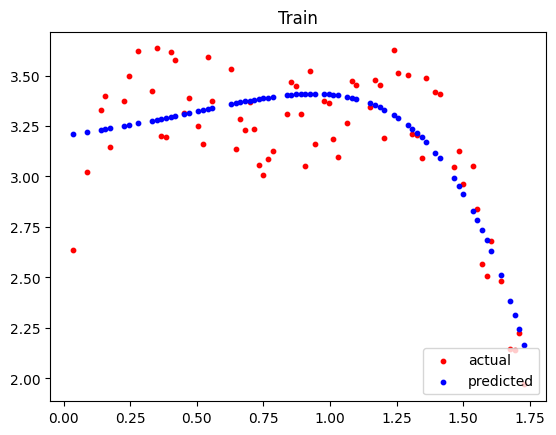

6


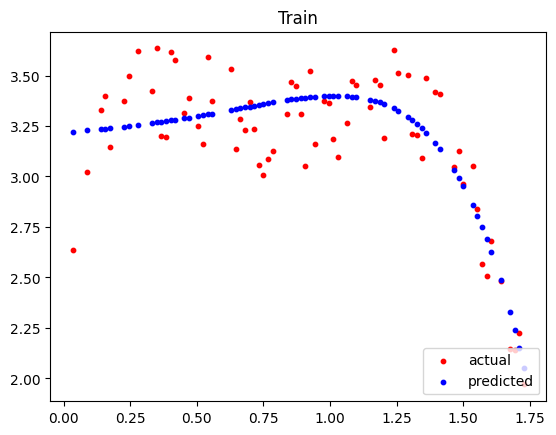

7


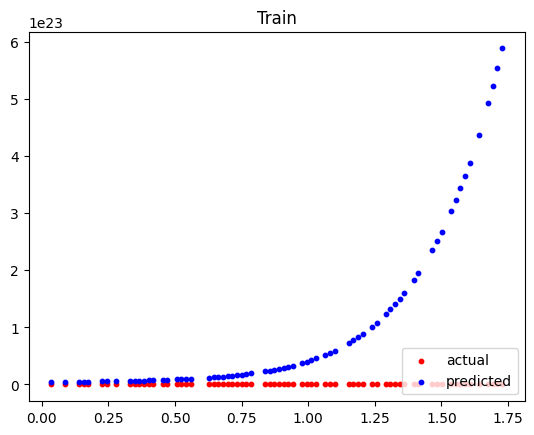

8


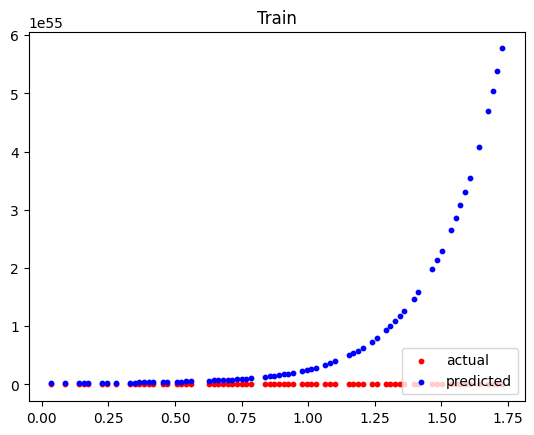

9


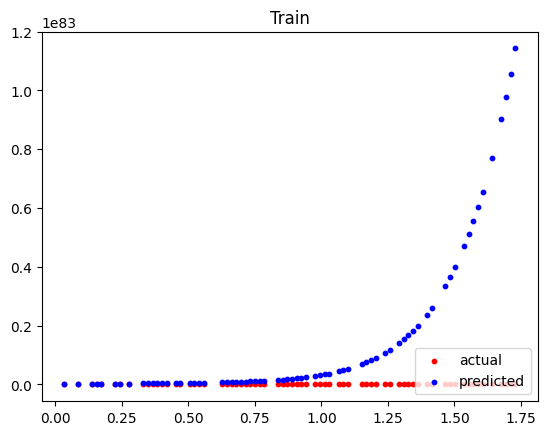

In [ ]:
X =x_train.reshape(-1,1)
Y = y_train

for i in range(1,10):
    print(i)
    model = PolynomailRegression( degree = i, learning_rate = 0.1, iterations = 100 )
    a,b=model.fit( X, Y )
    plot_pred(x_train,y_train,x_val,y_val,x_test,y_test)